# 0.**Data Preprocessing, dataset taken from Kaggle**
*(https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download)*

In [168]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Car_details.csv')

# Dropping NA and duplicates entries 
df = df.dropna()
# Dropna(): removes missing data

df = df.drop_duplicates()
# Drop_duplicates(): removes duplicate rows based on all columns.

# Removing Unnecessary Columns
df = df[df["owner"] != "Test Drive Car"]

# Reset index
df.reset_index(drop=True, inplace=True)

# Getting Company Name from Name of the Car
name = df["name"]
names = []

for i in range(len(name)):
    c = str(name[i]).split(" ")[0]
    names.append(c)
    
df["company"] = pd.DataFrame(names)
df.drop(['name'], axis=1, inplace=True)

# Labelling the string cells
cat_cols = ["fuel", "seller_type", "transmission", "owner", "company", "torque"]
le = preprocessing.LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

# Remove units
df.mileage = df.mileage.apply(lambda x: x.replace("kmpl", ""))
df.mileage = df.mileage.apply(lambda x: x.replace("km/kg", ""))
df.mileage = df.mileage.apply(lambda x: float(x))
df.engine = df.engine.apply(lambda y: float(y.replace("CC", "")))
df.max_power = df.max_power.apply(lambda z: float(z.replace("bhp", "")))

# Training set splitting
X = df.drop(columns=["selling_price"])
y = df["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_train_gd = X_train_std.copy()
y_train_gd = y_train.copy()

X_train_rf = X_train_std.copy()
y_train_rf = y_train.copy()

print(X_train.shape)

(5369, 12)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6712 non-null   int64  
 1   selling_price  6712 non-null   int64  
 2   km_driven      6712 non-null   int64  
 3   fuel           6712 non-null   int32  
 4   seller_type    6712 non-null   int32  
 5   transmission   6712 non-null   int32  
 6   owner          6712 non-null   int32  
 7   mileage        6712 non-null   float64
 8   engine         6712 non-null   float64
 9   max_power      6712 non-null   float64
 10  torque         6712 non-null   int32  
 11  seats          6712 non-null   float64
 12  company        6712 non-null   int32  
dtypes: float64(4), int32(6), int64(3)
memory usage: 524.5 KB


In [12]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company
count,6712.000000,6.712000e+03,6.712000e+03,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000
mean,2013.607122,5.234976e+05,7.344212e+04,1.882300,0.905542,0.914928,0.806019,19.468489,1430.757002,87.710610,216.056615,5.434595,17.730036
std,3.896075,5.092571e+05,5.870280e+04,1.001937,0.305932,0.279009,1.076941,4.048326,493.570825,31.658543,129.378397,0.984100,6.891595
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,32.800000,0.000000,2.000000,0.000000
25%,2011.000000,2.500000e+05,3.800000e+04,1.000000,1.000000,1.000000,0.000000,16.800000,1197.000000,67.100000,116.000000,5.000000,11.000000
50%,2014.000000,4.200000e+05,6.855950e+04,1.000000,1.000000,1.000000,0.000000,19.440000,1248.000000,81.830000,192.000000,5.000000,20.000000
75%,2017.000000,6.500000e+05,1.000000e+05,3.000000,1.000000,1.000000,2.000000,22.510000,1498.000000,100.000000,315.000000,5.000000,20.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,3.000000,42.000000,3604.000000,400.000000,438.000000,14.000000,30.000000


# 1. Linear Regression
* Original way

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.linear_model import LinearRegression
from sklearn import *

warnings.simplefilter(action='ignore')
plt.style.use('seaborn')


In [16]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_std, y_train)

# Linear Regression - Training 
lin_train_pred = linear_regression.predict(X_train_std)
print(lin_train_pred)

# Linear Regression - Testing 
lin_test_pred = linear_regression.predict(X_test_std)
print(lin_test_pred)

[ 104279.35524464  -84054.68720574  473512.61874191 ...  825846.90228087
 1107093.18507145  785080.59070629]
[ 500266.28001806 1634838.31420581  310364.98533358 ...   98520.69678592
  673863.50769808  498610.01724909]


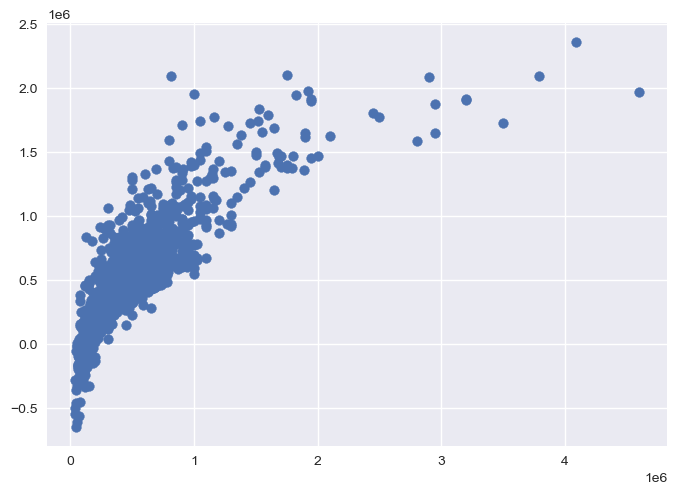

In [17]:
plt.scatter(y_test,lin_test_pred)

In [176]:
#RMSE and Accuracy rate comparing
print('RMSE on train set:', np.sqrt(metrics.mean_squared_error(y_train, lin_train_pred)))
print('RMSE on test set:', np.sqrt(metrics.mean_squared_error(y_test, lin_test_pred)))

r2_score_train = metrics.r2_score(y_train, lin_train_pred)
print(f"Accuracy on Training: R Square: {r2_score_train}")
r2_score_test = metrics.r2_score(y_test, lin_test_pred)
print(f"Accuracy on Testing: R Square: {r2_score_test}")

RMSE on train set: 317568.0742442379
RMSE on test set: 250723.86197856913
Accuracy on Training: R Square: 0.6396152498936332
Accuracy on Testing: R Square: 0.6444455745326341


# 2. Gradient Descent
* **Batch Gradient Descent** : Based on 
$$\theta_{next} = \theta - \eta\bigtriangledown_{\theta}MSE(\theta) = \theta-\eta\frac{2}{m}X^T(X\theta-y)$$

In [104]:
class GDLinearRegression:
    def __init__(self, lr, step):
        #learning rate and step setting
        self.lr = lr
        self.step = step

    def fit(self, X, y):
        
        # standardize the data form
        self.n_features = X.shape[1] if len(X.shape) > 1 else 1 
        train_size = len(X)
        X = X.reshape(-1, self.n_features)
        y = y.values.reshape([-1, 1])

        # because we want to guess y = X.T*W + bias, we put bias in W (W|bias) and a column of full one on X (X|one)
        # so the computation is y = (X|one).T*(W|bias), which is a lot easier and faster
        one = np.ones([train_size, 1])
        X = np.concatenate([X, one], 1)

        self.weight = np.zeros([self.n_features + 1, 1])
        self.train_loss = []

        # train
        for i in range(self.step):
            loss = np.sum((y - np.dot(X, self.weight)) ** 2)
            delta = np.dot(X.T, (np.dot(X, self.weight) - y))

            # update weight
            self.weight = self.weight - (self.lr/train_size) * delta

            # loss average
            loss = loss/train_size
            #print(loss)
            
            self.train_loss.append(loss.item())

    def predict(self, X):

        # format standardizing
        X = X.reshape(-1, self.n_features)

        # add more column of full 1
        one = np.ones([len(X), 1])
        X = np.concatenate([X, one], 1)

        # prediction
        y_hat = np.dot(X, self.weight)

        return y_hat

    def print_weight(self):
        print(self.weight)

    def get_train_loss(self):
        return self.train_loss

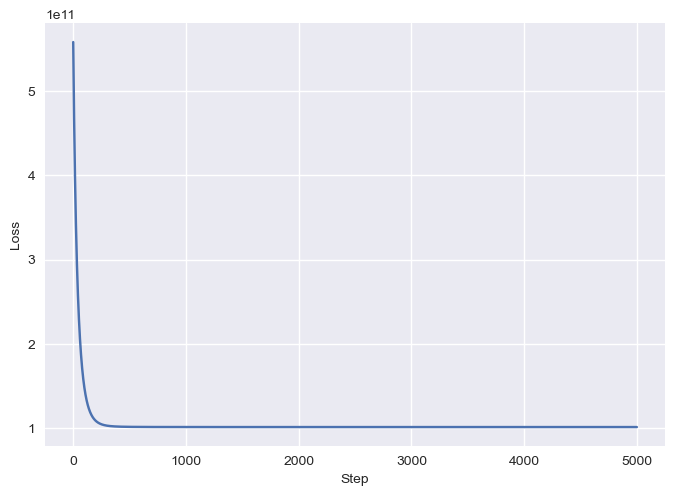

In [105]:
mymodel = GDLinearRegression(0.01, 5000)
mymodel.fit(X_train_gd, y_train_gd)

train_loss = mymodel.get_train_loss()
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

In [125]:
y_hat_train = mymodel.predict(X_train_gd)
y_hat_test = mymodel.predict(X_test_std)

rmse_train = np.sqrt(metrics.mean_squared_error(y_hat_train, y_train))
print('Train RMSE: ', rmse_train)
rmse_test = np.sqrt(metrics.mean_squared_error(y_hat_test, y_test))
print('Test RMSE: ', rmse_test)

r2_score_train = metrics.r2_score(y_train, y_hat_train)
print(f"Accuracy on Training: {r2_score_train}")
r2_score_test = metrics.r2_score(y_test, y_hat_test)
print(f"Accuracy on Testing: {r2_score_test}")

Train RMSE:  317694.37329975876
Test RMSE:  252614.3035677492
Accuracy on Training: 0.6393285377942641
Accuracy on Testing: 0.63906364662375


* **Stochastic Gradient Descent (SGD)**: Given number of epochs, after each epoch, we shuffle (X,y) to manage the stochastic property
$$\theta_{next} = \theta - \eta\bigtriangledown_{\theta}MSE(\theta;X_i;y_i)$$

In [117]:
class SGDLinearRegression:
    def __init__(self, lr, step, epoch, t1, t0):
        #learning rate and step setting
        self.lr = lr
        self.step = step
        self.epoch = epoch
        self.t0 = t0
        self.t1 = t1
        
    def fit(self, X, y):
        
        # standardize the data form
        self.n_features = X.shape[1] if len(X.shape) > 1 else 1 
        train_size = len(X)
        X = X.reshape(-1, self.n_features)
        y = y.values.reshape([-1, 1])

        # because we want to guess y = X.T*W + bias, we put bias in W (W|bias) and a column of full one on X (X|one)
        # so the computation is y = (X|one).T*(W|bias), which is a lot easier and faster
        one = np.ones([train_size, 1])
        X = np.concatenate([X, one], 1)

        self.weight = np.zeros([self.n_features + 1, 1])
        self.train_loss = []
        
        def learning_schedule(t):
            return self.t0/(t + self.t1)

        # train
        for epoch in range (self.epoch):    
            for i in range(self.step):
                random_index = np.random.randint(self.step)
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                loss = np.sum((yi - np.dot(xi, self.weight)) ** 2)
                delta = np.dot(xi.T, (np.dot(xi, self.weight) - yi))

                # update weight
                self.lr = learning_schedule(epoch * self.step + i)
                self.weight = self.weight - self.lr * delta

                # loss average
                loss = loss/train_size
                #print(loss)

                self.train_loss.append(loss.item())

    def predict(self, X):

        # format standardizing
        X = X.reshape(-1, self.n_features)

        # add more column of full 1
        one = np.ones([len(X), 1])
        X = np.concatenate([X, one], 1)

        # prediction
        y_hat = np.dot(X, self.weight)

        return y_hat

    def print_weight(self):
        print(self.weight)

    def get_train_loss(self):
        return self.train_loss        

In [128]:
mymodel = SGDLinearRegression(0.01, 5000, 50, 50, 5)

mymodel.fit(X_train_gd, y_train_gd)

In [129]:
y_hat_train = mymodel.predict(X_train_gd)
y_hat_test = mymodel.predict(X_test_std)

rmse_train = np.sqrt(metrics.mean_squared_error(y_hat_train, y_train))
print('Train RMSE: ', rmse_train)
rmse_test = np.sqrt(metrics.mean_squared_error(y_hat_test, y_test))
print('Test RMSE: ', rmse_test)

r2_score_train = metrics.r2_score(y_train, y_hat_train)
print(f"Accuracy on Training: {r2_score_train}")
r2_score_test = metrics.r2_score(y_test, y_hat_test)
print(f"Accuracy on Testing: {r2_score_test}")

Train RMSE:  317598.1540874438
Test RMSE:  250187.62804655673
Accuracy on Training: 0.6395469758380833
Accuracy on Testing: 0.6459648273022549


**Comparing the Batch GD and SGD, we can see the number of implements of SGD is way too much lower, but the accuracy gained is slightly over than the Batch GD, which means SGD is a lot stronger**

* Or we can use the SGDRegressor pack in Scikitlearn library

In [130]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1e-3, penalty=None, eta0=0.01)
sgd_reg.fit(X_train_gd, y_train_gd.ravel())

SGDRegressor(max_iter=50, penalty=None)

In [131]:
y_hat_train = sgd_reg.predict(X_train_gd)
y_hat_test = sgd_reg.predict(X_test_std)

rmse_train = np.sqrt(metrics.mean_squared_error(y_hat_train, y_train))
print('Train RMSE: ', rmse_train)
rmse_test = np.sqrt(metrics.mean_squared_error(y_hat_test, y_test))
print('Test RMSE: ', rmse_test)

r2_score_train = metrics.r2_score(y_train, y_hat_train)
print(f"Accuracy on Training: {r2_score_train}")
r2_score_test = metrics.r2_score(y_test, y_hat_test)
print(f"Accuracy on Testing: {r2_score_test}")

Train RMSE:  318031.5523383022
Test RMSE:  252133.08399088826
Accuracy on Training: 0.6385625475734871
Accuracy on Testing: 0.6404374738463736


# 3. Ridge Regression
$$ J(\theta) = MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2 \Leftrightarrow \hat{\theta}=(X^TX+\alpha I_{n+1})^{-1}X^Ty $$ 

In [143]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train_gd, y_train_gd)
ridge_reg.predict([[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
                   [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]])
#depends on the prediction, here we choose this matrix

array([1026011.46302312, 1026011.46302312])

In [144]:
y_hat_train = ridge_reg.predict(X_train_gd)
y_hat_test = ridge_reg.predict(X_test_std)

rmse_train = np.sqrt(metrics.mean_squared_error(y_hat_train, y_train))
print('Train RMSE: ', rmse_train)
rmse_test = np.sqrt(metrics.mean_squared_error(y_hat_test, y_test))
print('Test RMSE: ', rmse_test)

r2_score_train = metrics.r2_score(y_train, y_hat_train)
print(f"Accuracy on Training: {r2_score_train}")
r2_score_test = metrics.r2_score(y_test, y_hat_test)
print(f"Accuracy on Testing: {r2_score_test}")

Train RMSE:  317568.08087195293
Test RMSE:  250711.1808753304
Accuracy on Training: 0.6396152348510162
Accuracy on Testing: 0.6444815400631361


* A little bit of SGD applied here, but the answer is not precisely good because I'm lazy to choose the tuner

In [155]:
sgd_reg_ridge = SGDRegressor(penalty="l2")
sgd_reg_ridge.fit(X_train_gd, y_train_gd.ravel())
sgd_reg_ridge.predict([[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
                   [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]])

array([1020003.3912455, 1020003.3912455])

In [156]:
y_hat_train = sgd_reg_ridge.predict(X_train_gd)
y_hat_test = sgd_reg_ridge.predict(X_test_std)

rmse_train = np.sqrt(metrics.mean_squared_error(y_hat_train, y_train))
print('Train RMSE: ', rmse_train)
rmse_test = np.sqrt(metrics.mean_squared_error(y_hat_test, y_test))
print('Test RMSE: ', rmse_test)

r2_score_train = metrics.r2_score(y_train, y_hat_train)
print(f"Accuracy on Training: {r2_score_train}")
r2_score_test = metrics.r2_score(y_test, y_hat_test)
print(f"Accuracy on Testing: {r2_score_test}")

Train RMSE:  319672.4094370074
Test RMSE:  248576.8748672949
Accuracy on Training: 0.6348233138690131
Accuracy on Testing: 0.6505088373749042


# 4. Lasso Regression
$$ J(\theta) = MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i| $$

In [158]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_gd, y_train_gd)
lasso_reg.predict([[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
                   [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]])

array([1026223.51344743, 1026223.51344743])

In [162]:
y_hat_train = lasso_reg.predict(X_train_gd)
y_hat_test = lasso_reg.predict(X_test_std)

rmse_train = np.sqrt(metrics.mean_squared_error(y_hat_train, y_train))
print('Train RMSE: ', rmse_train)
rmse_test = np.sqrt(metrics.mean_squared_error(y_hat_test, y_test))
print('Test RMSE: ', rmse_test)

r2_score_train = metrics.r2_score(y_train, y_hat_train)
print(f"Accuracy on Training: {r2_score_train}")
r2_score_test = metrics.r2_score(y_test, y_hat_test)
print(f"Accuracy on Testing: {r2_score_test}")

Train RMSE:  317568.0742444499
Test RMSE:  250723.82301208153
Accuracy on Training: 0.6396152498931519
Accuracy on Testing: 0.6444456850502842


# 5. Random Forest

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor()

Rf.fit(X_train_rf, y_train_rf)

Rf_train_pred = Rf.predict(X_train_rf)
Rf_test_pred = Rf.predict(X_test_std)

In [175]:
r2_score_train = metrics.r2_score(y_train_rf, Rf_train_pred)
r2_score_test = metrics.r2_score(y_test, Rf_test_pred)

print('RMSE on the train set:', np.sqrt(metrics.mean_squared_error(y_train_rf, Rf_train_pred)))
print('RMSE on the test set:', np.sqrt(metrics.mean_squared_error(y_test, Rf_test_pred)))
print(f"Accuracy on the train set: {r2_score_train}")
print(f"Accuracy on the test set: {r2_score_test}")

RMSE on the train set: 64644.19978579845
RMSE on the test set: 128026.96957217836
Accuracy on the train set: 0.9850668350611635
Accuracy on the test set: 0.9072918995723998
